In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import sklearn
from math import *
from prettytable import PrettyTable
from functools import partial
from decimal import Decimal

plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]  # 黑体
plt.rcParams["axes.unicode_minus"] = False  # 解决无法显示符号的问题
palette = "deep"
sns.set(font="Microsoft YaHei", font_scale=1, palette=palette)  # 解决Seaborn中文显示问题

best_x: [ 0.8451534  -0.85493089] 
 best_y: [0.00171755]


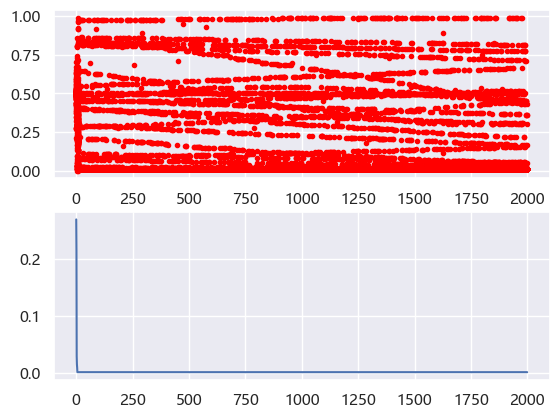

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sko.GA import GA
import numpy as np


def schaffer(p):
    """
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    https://en.wikipedia.org/wiki/Test_functions_for_optimization
    """
    x1, x2 = p
    part1 = np.square(x1) - np.square(x2)
    part2 = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(part1)) - 0.5) / np.square(1 + 0.001 * part2)


# %%

ga = GA(
    func=schaffer,
    n_dim=2,
    size_pop=100,
    max_iter=2000,
    prob_mut=0.001,
    lb=[-100, -100],
    ub=[100, 100],
    precision=1e-7,
)
best_x, best_y = ga.run()
print("best_x:", best_x, "\n", "best_y:", best_y)
# %% Plot the result

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, ".", color="red")
Y_history.min(axis=1).cummin().plot(kind="line")
plt.show()